## Студентка: Елисеева Елизавета ИУ5-23М


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import OneHotEncoder

import sklearn

In [2]:
data = pd.read_csv("weatherHistory.csv")
%matplotlib inline

In [3]:
data.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Formatted Date', ('object', 0)),
 ('Summary', ('object', 0)),
 ('Precip Type', ('object', 517)),
 ('Temperature (C)', ('float64', 0)),
 ('Apparent Temperature (C)', ('float64', 0)),
 ('Humidity', ('float64', 0)),
 ('Wind Speed (km/h)', ('float64', 0)),
 ('Wind Bearing (degrees)', ('float64', 0)),
 ('Visibility (km)', ('float64', 0)),
 ('Loud Cover', ('float64', 0)),
 ('Pressure (millibars)', ('float64', 0)),
 ('Daily Summary', ('object', 0))]

# Масштабирование 
Тремя способами

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import MaxAbsScaler

data_scale = data.copy()
del data_scale['Formatted Date']
del data_scale['Summary']
del data_scale['Precip Type']
del data_scale['Daily Summary']
data_scale.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [6]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=data_scale.columns)
    return res
# Масштабирование данных на основе Z-оценки
# x′=(x−μ(x))/σ(x)
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(data_scale)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,-0.257599,-0.324035,0.793470,0.478635,0.591256,1.306976,0.0,0.101685
1,-0.269814,-0.339097,0.639996,0.499594,0.665756,1.306976,0.0,0.105960
2,-0.267487,-0.138102,0.793470,-0.995473,0.153570,1.099586,0.0,0.108610
3,-0.381489,-0.459071,0.486521,0.476306,0.758881,1.306976,0.0,0.112628
4,-0.332631,-0.362469,0.486521,0.033841,0.665756,1.306976,0.0,0.113483
...,...,...,...,...,...,...,...,...
96448,1.474532,1.417400,-1.559811,0.026855,-1.457488,1.372265,0.0,0.095102
96449,1.324468,1.283404,-1.304020,-0.103556,-1.559925,1.241686,0.0,0.101942
96450,1.058076,1.045534,-0.894753,-0.264241,-1.466800,1.372265,0.0,0.106216
96451,1.003983,0.997233,-0.690120,-0.040680,-1.559925,1.372265,0.0,0.108696


In [7]:
data_cs11_scaled.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,9.645300e+04,9.645300e+04,9.645300e+04,9.645300e+04,9.645300e+04,9.645300e+04,96453.0,9.645300e+04
mean,-5.392443e-17,-8.633802e-17,4.561476e-16,-3.064558e-17,-1.001875e-16,-4.243234e-17,0.0,-2.093329e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,1.000005e+00
min,-3.533991e+00,-3.605912e+00,-3.759618e+00,-1.563692e+00,-1.746175e+00,-2.468291e+00,0.0,-8.576917e+00
25%,-7.583931e-01,-7.987365e-01,-6.901201e-01,-7.206791e-01,-6.659277e-01,-4.788827e-01,0.0,7.407110e-02
50%,7.048274e-03,1.070387e-01,2.307292e-01,-1.221864e-01,-6.992952e-02,-7.178379e-02,0.0,1.129702e-01
75%,7.230501e-01,7.463789e-01,7.934704e-01,4.809638e-01,9.544424e-01,1.065021e+00,0.0,1.526387e-01
max,2.928638e+00,2.663361e+00,1.356212e+00,7.672191e+00,1.597003e+00,1.372265e+00,0.0,3.688493e-01


In [8]:
# Второй способ

In [9]:
# Масштабирование "Mean Normalisation"
# x′=(x−μ(x))/(max(x)−min(x))
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = param_df.mean(axis=0)
        maxs = param_df.max(axis=0)
        mins = param_df.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [10]:
sc21 = MeanNormalisation()

data_scale = data.copy()
del data_scale['Formatted Date']
del data_scale['Summary']
del data_scale['Precip Type']
del data_scale['Daily Summary']

data_cs21_scaled = sc21.fit_transform(data_scale)
data_cs21_scaled.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,9.645300e+04,9.645300e+04,9.645300e+04,9.645300e+04,9.645300e+04,9.645300e+04,0.0,9.645300e+04
mean,1.934870e-16,-4.896662e-16,4.506019e-14,1.181984e-14,-2.873023e-17,1.863510e-13,NaN,-1.338004e-14
std,1.547366e-01,1.595089e-01,1.954727e-01,1.082739e-01,2.991182e-01,2.603803e-01,NaN,1.117853e-01
min,-5.468349e-01,-5.751723e-01,-7.348990e-01,-1.693062e-01,-5.223098e-01,-6.426910e-01,NaN,-9.587683e-01
25%,-1.173506e-01,-1.274050e-01,-1.348990e-01,-7.803034e-02,-1.991901e-01,-1.246910e-01,NaN,8.280017e-03
50%,1.090620e-03,1.707355e-02,4.510103e-02,-1.322953e-02,-2.091708e-02,-1.869099e-02,NaN,1.262834e-02
75%,1.118817e-01,1.190535e-01,1.551010e-01,5.207556e-02,2.854896e-01,2.773090e-01,NaN,1.706268e-02
max,4.531651e-01,4.248277e-01,2.651010e-01,8.306938e-01,4.776902e-01,3.573090e-01,NaN,4.123172e-02


In [11]:
# Третий способ

In [12]:
# MinMax-масштабирование
# x′=(x−min(x))/(max(x)−min(x))

# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(data_scale)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,0.546835,0.575172,0.734899,0.169306,0.522310,0.642691,0.0,0.958768
std,0.154737,0.159509,0.195473,0.108274,0.299118,0.260380,0.0,0.111785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.429484,0.447767,0.600000,0.091276,0.323120,0.518000,0.0,0.967048
50%,0.547925,0.592246,0.780000,0.156077,0.501393,0.624000,0.0,0.971397
75%,0.658717,0.694226,0.890000,0.221382,0.807799,0.920000,0.0,0.975831
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


# Обработка выбросов числовых признаков

2 способа:
Удаление и замена

<AxesSubplot:>

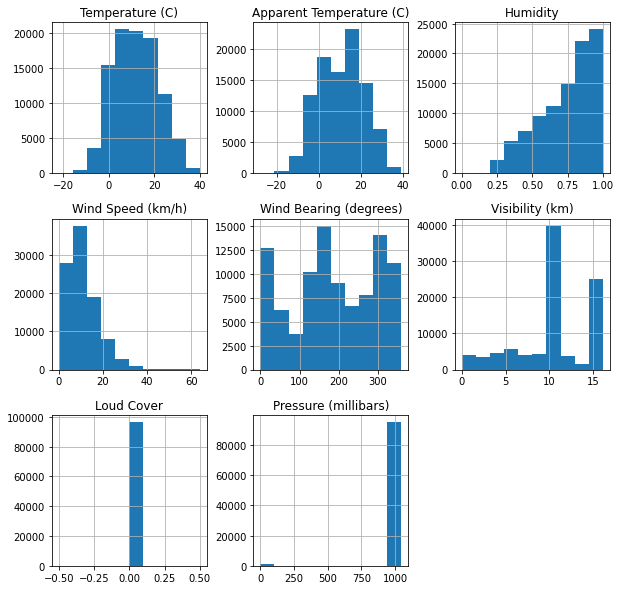

In [15]:
data.hist(figsize=(10,10));


<AxesSubplot:>

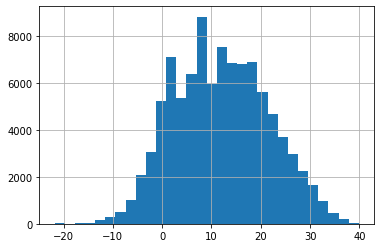

In [20]:
data['Temperature (C)'].hist(bins=30)
# Выбросов не наблюдается, поэтому нормализуем скорость ветра и удалим выбросы оттуда

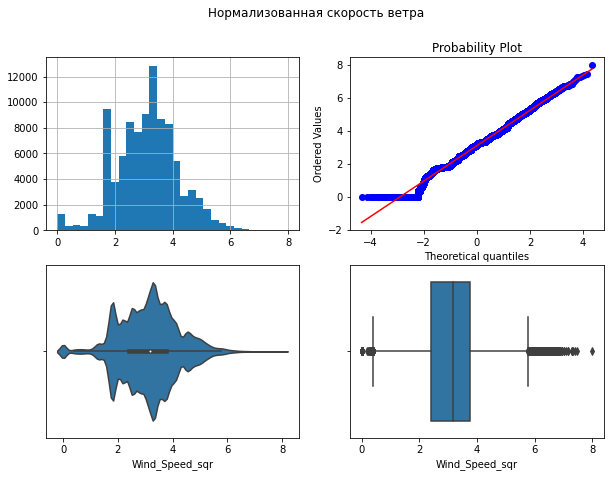

In [24]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()
data['Wind_Speed_sqr'] = data['Wind Speed (km/h)']**(1/2) 
diagnostic_plots(data, 'Wind_Speed_sqr', 'Нормализованная скорость ветра')

In [25]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

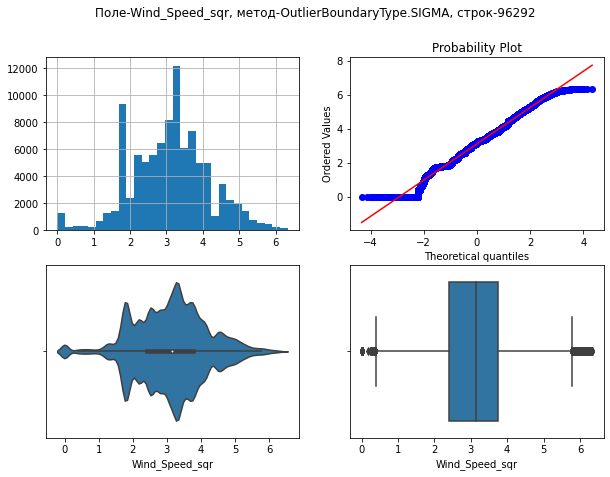

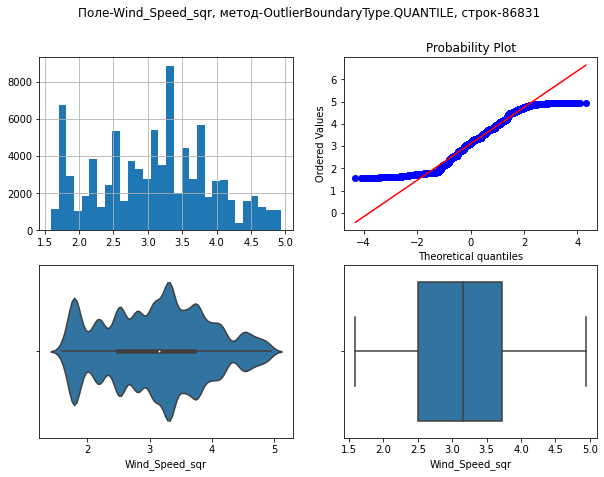

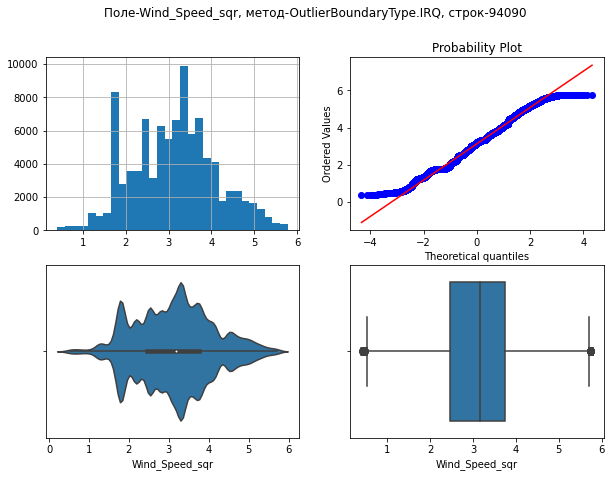

In [26]:
# удаление выбросов
x_col_list = ['Wind_Speed_sqr']
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

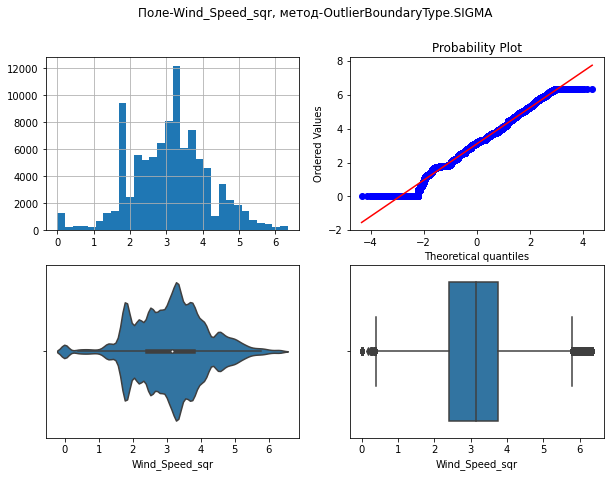

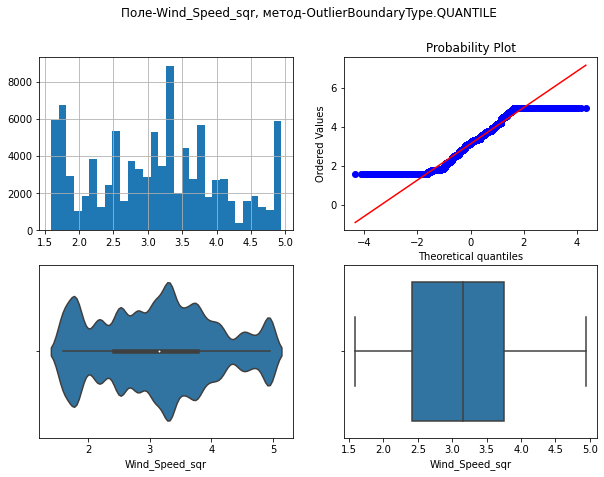

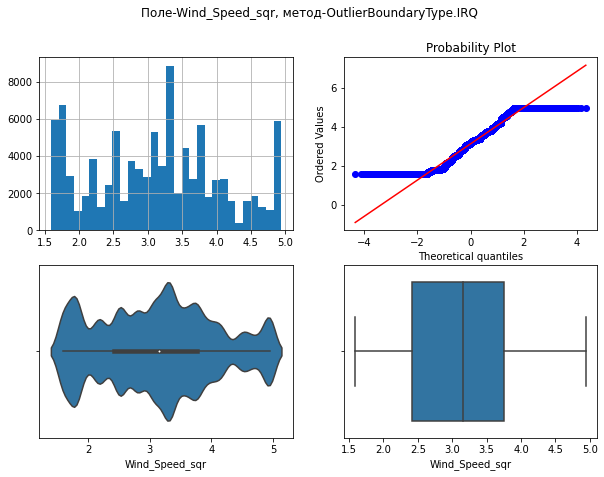

In [27]:
# Замена выбросов
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

# Обработка нестандартного признака

In [28]:
data['year'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).year))
data['month'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).month))
data['day'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).day))
data['hour'] = pd.DataFrame(data['Formatted Date'].apply(lambda x: pd.to_datetime(x).hour))

del data['Formatted Date']
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Wind_Speed_sqr,year,month,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,3.757619,2006,4,1,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,3.776851,2006,4,1,1
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1.982019,2006,4,1,2
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,3.755476,2006,4,1,3
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,3.323342,2006,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,3.316067,2016,9,9,19
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,3.177216,2016,9,9,20
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2.997299,2016,9,9,21
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,3.244904,2016,9,9,22


# Отбор признаков

один метод из группы методов фильтрации (filter methods);   
один метод из группы методов обертывания (wrapper methods);   
один метод из группы методов вложений (embedded methods).   

In [30]:
# filter methods
from sklearn.feature_selection import VarianceThreshold

del data['Summary']
del data['Precip Type']
del data['Daily Summary']

selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data)

# Значения дисперсий для каждого признака
selector_1211.variances_


array([9.12310912e+01, 1.14421358e+02, 3.82091956e-02, 4.77969686e+01,
       1.15310811e+04, 1.75737147e+01, 0.00000000e+00, 1.36818170e+04,
       9.01756139e-01, 9.99903564e+00, 1.18919953e+01, 7.74772132e+01,
       4.79147071e+01])

Отсюда следует что Влажность (Humidity), Loud Cover, Год (year) имеют очень маленькую дисперсию, а значит слабо могут повлиять на целевой признак.

<AxesSubplot:>

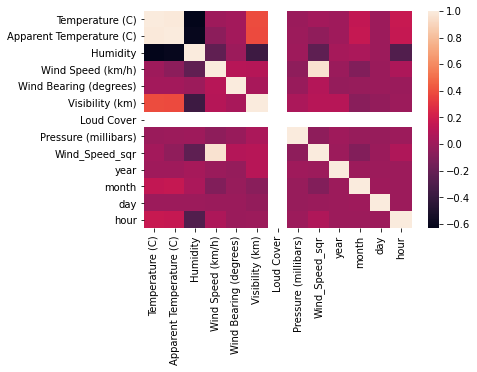

In [32]:
# Метод основанный на корреляции
sns.heatmap(data.corr())

In [33]:
# Формирование DataFrame с корреляциями больше половины
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.4]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

make_corr_df(data)

,f1,f2,corr
0,Apparent Temperature (C),Temperature (C),0.992629
1,Temperature (C),Apparent Temperature (C),0.992629
2,Wind Speed (km/h),Wind_Speed_sqr,0.959835
3,Wind_Speed_sqr,Wind Speed (km/h),0.959835
4,Humidity,Temperature (C),0.632255
5,Temperature (C),Humidity,0.632255
6,Humidity,Apparent Temperature (C),0.602571
7,Apparent Temperature (C),Humidity,0.602571


In [35]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

corr_groups(make_corr_df(data))

[['Temperature (C)', 'Humidity', 'Apparent Temperature (C)'],
 ['Wind_Speed_sqr', 'Wind Speed (km/h)']]

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)


In [61]:
X = data.drop(columns = ['Wind Speed (km/h)', 'Apparent Temperature (C)', 'year', 'hour', 'day', 'Loud Cover'])
y = data['hour']
# По каким признакам можно узнать какое сейчас время


feature_names = [i for i in X.columns]
feature_names

['Temperature (C)',
 'Humidity',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Wind_Speed_sqr',
 'month',
 'day']

In [62]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished

[2021-05-08 22:09:32] Features: 1/3 -- score: 0.14448487864555795[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.5s finished

[2021-05-08 22:10:02] Features: 2/3 -- score: 0.3944304479902129[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.2s finished

[2021-05-08 22:10:27] Features: 3/3 -- score: 0.42604169906586625

In [63]:
sfs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.14448488]),
  'avg_score': 0.14448487864555795,
  'feature_names': ('Temperature (C)',)},
 2: {'feature_idx': (0, 5),
  'cv_scores': array([0.39443045]),
  'avg_score': 0.3944304479902129,
  'feature_names': ('Temperature (C)', 'Pressure (millibars)')},
 3: {'feature_idx': (0, 3, 5),
  'cv_scores': array([0.4260417]),
  'avg_score': 0.42604169906586625,
  'feature_names': ('Temperature (C)',
   'Visibility (km)',
   'Pressure (millibars)')}}

In [64]:
# embedded methods

# Удаляю заведомо ненужные поля и ставлю целевой признак
# X = data.drop(columns = ['Wind Speed (km/h)', 'Apparent Temperature (C)', 'year', 'hour'])
# y = data['hour']

In [65]:
feature_names = [i for i in X.columns]
feature_names

['Temperature (C)',
 'Humidity',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Wind_Speed_sqr',
 'month',
 'day']

In [67]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X, y)
# Коэффициенты регрессии
list(zip(feature_names, e_ls1.coef_))

[('Temperature (C)', 0.11966517200166137),
 ('Humidity', -0.0),
 ('Wind Bearing (degrees)', -0.00041074145039295183),
 ('Visibility (km)', -0.04167254651270703),
 ('Loud Cover', 0.0),
 ('Pressure (millibars)', 8.492579238538055e-05),
 ('Wind_Speed_sqr', 0.0),
 ('month', -0.0),
 ('day', -0.0)]

In [68]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X, y)
list(zip(feature_names, sel_e_ls1.get_support()))

[('Temperature (C)', True),
 ('Humidity', False),
 ('Wind Bearing (degrees)', True),
 ('Visibility (km)', True),
 ('Loud Cover', False),
 ('Pressure (millibars)', True),
 ('Wind_Speed_sqr', False),
 ('month', False),
 ('day', False)]